In [1]:
# opemm imports
import simtk.unit as u
import simtk.openmm as mm
import simtk.openmm.app as app

In [2]:
# ParmEd imports
from chemistry.charmm import  CharmmPsfFile
from chemistry.charmm.parameters import CharmmParameterSet

In [3]:
import TorsionScanSet, TorsionFitModel
import glob
from pymc import MCMC
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
param = CharmmParameterSet('../charmm_ff/top_all36_cgenff.rtf', '../charmm_ff/par_all36_cgenff.prm')
stream = '../structures/Pyrrol/pyrrol.str'
structure = '../structures/Pyrrol/pyrrol.psf'

#create pymc model
model = TorsionFitModel.TorsionFitModel(param, stream, ['pyrrol'])
mcmc = MCMC(model)
sample = mcmc.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 80.7 sec

(array([ 456.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  444.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

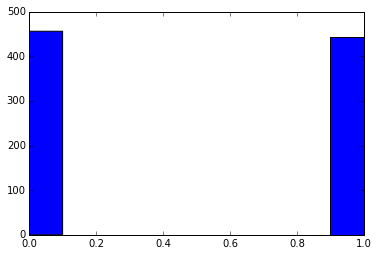

In [5]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_1_Phase')[:])

(array([  95.,   94.,   79.,  102.,   82.,   91.,  104.,   70.,   86.,   97.]),
 array([  0.02376539,   2.02082243,   4.01787947,   6.01493651,
          8.01199356,  10.0090506 ,  12.00610764,  14.00316469,
         16.00022173,  17.99727877,  19.99433582]),
 <a list of 10 Patch objects>)

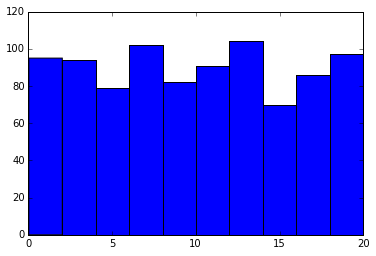

In [6]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_1_K')[:])

(array([ 110.,   95.,   70.,   93.,   94.,   67.,  111.,   93.,   77.,   90.]),
 array([  0. ,   6.3,  12.6,  18.9,  25.2,  31.5,  37.8,  44.1,  50.4,
         56.7,  63. ]),
 <a list of 10 Patch objects>)

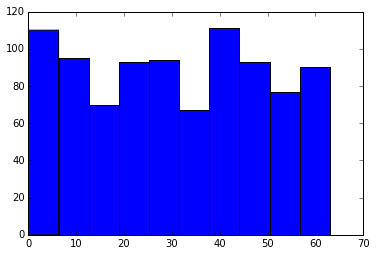

In [7]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_multiplicity_bitstring')[:])

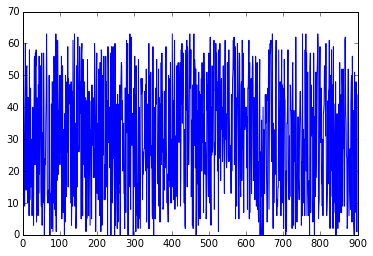

In [8]:
plt.plot(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_multiplicity_bitstring')[:])

In [16]:
# Torsion Scan
logfiles = glob.glob('../structures/Pyrrol/torsion-scan/*.log')
scan = TorsionScanSet.read_scan_logfile(logfiles, structure)
# Remove all non optimized geometries
scan_opt = scan.extract_geom_opt()

loading ../structures/Pyrrol/torsion-scan/PRL.scan2.neg.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan2.pos.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan3.neg.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan3.pos.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan4.neg.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan4.pos.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan5.neg.log
loading ../structures/Pyrrol/torsion-scan/PRL.scan5.pos.log


In [17]:
# compute mm energy
scan_opt.compute_energy_from_positions(param)
scan_opt.to_dataframe()

,torsion,scan_direction,step_point_total,QM_energy KJ/mol,MM_energy KJ/mole,delta KJ/mole
0,"[2, 5, 6, 7]",0,"[2, 1, 7]",-964629.156046 kJ/mol,43.5042463908 kJ/mol,-964672.660293 kJ/mol
1,"[2, 5, 6, 7]",0,"[6, 2, 7]",-964627.250844 kJ/mol,46.1033652642 kJ/mol,-964673.35421 kJ/mol
2,"[2, 5, 6, 7]",0,"[5, 3, 7]",-964622.329681 kJ/mol,51.5999322751 kJ/mol,-964673.929614 kJ/mol
3,"[2, 5, 6, 7]",0,"[9, 4, 7]",-964616.653543 kJ/mol,56.5975354875 kJ/mol,-964673.251078 kJ/mol
4,"[2, 5, 6, 7]",0,"[6, 5, 7]",-964613.23588 kJ/mol,57.7700106875 kJ/mol,-964671.005891 kJ/mol
5,"[2, 5, 6, 7]",0,"[6, 6, 7]",-964614.826067 kJ/mol,55.0908226196 kJ/mol,-964669.916889 kJ/mol
6,"[2, 5, 6, 7]",0,"[6, 7, 7]",-964619.578995 kJ/mol,51.8808623717 kJ/mol,-964671.459858 kJ/mol
7,"[2, 5, 6, 7]",1,"[2, 1, 7]",-964629.156046 kJ/mol,43.5042463908 kJ/mol,-964672.660293 kJ/mol
8,"[2, 5, 6, 7]",1,"[7, 2, 7]",-964627.144126 kJ/mol,45.1683294131 kJ/mol,-964672.312455 kJ/mol
9,"[2, 5, 6, 7]",1,"[9, 3, 7]",-964622.217927 kJ/mol,50.9228599418 kJ/mol,-964673.140787 kJ/mol
